### 데이터 EDA


In [2]:
import json
import os
import pandas as pd

In [2]:
# 라벨 데이터 나이값 출력
def label_data(path_dir):
    file_list = os.listdir(path_dir)
    label, box, landmarks = [], [], []
    for filename in file_list:
        # 파일 경로
        path = os.path.join(path_dir+'/'+filename)

        # json 파일 추출
        with open(path, 'r') as label_file:
            label_data = json.load(label_file)
        
        # list
        label.append(label_data['age_past'])
        box.append(label_data['annotation'][0]['box'])
        landmarks.append(label_data['annotation'][0]['landmark'])
    return label, box, landmarks

In [3]:
lbl_train_output_dir = "D:\\Ddrive\\3rd\\data_ex\\training\\labels"
lbl_val_output_dir = "D:\\Ddrive\\3rd\\data_ex\\validation\\labels"

# train_data = img_data(img_train_output_dir)
train_labels, train_box, train_landmarks = label_data(lbl_train_output_dir)

# test_data = img_data(img_val_output_dir)
test_labels, test_box, test_landmarks = label_data(lbl_val_output_dir)

In [4]:
tr = pd.DataFrame(train_labels)
ts = pd.DataFrame(test_labels)

tr.columns = ['age']
ts.columns = ['age']

tr.age.nunique(), tr.age.unique(), ts.age.nunique(), ts.age.unique()

(83,
 array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 19,
        22, 26, 28, 29, 17, 18, 20, 35, 27, 30, 32, 24, 25, 23, 33, 34, 31,
         0, 21, 37, 39, 40, 42, 43, 44, 45, 46, 49, 50, 51, 38, 41, 52, 54,
        36, 53, 55, 56, 57, 58, 59, 47, 48, 60, 61, 62, 63, 64, 65, 66, 67,
        68, 69, 70, 71, 72, 73, 75, 74, 78, 79, 80, 76, 77, 81, 82],
       dtype=int64),
 76,
 array([ 4,  6,  8,  9, 10, 13, 14, 15, 16, 17, 18, 22, 24, 25, 26, 28, 31,
        32, 37, 42, 43, 45,  0,  1,  2,  3,  5,  7, 11, 12, 19, 20, 21, 23,
        29, 30, 33, 34, 35, 36, 38, 39, 40, 27, 41, 44, 47, 48, 46, 49, 50,
        51, 52, 53, 55, 57, 58, 59, 60, 61, 63, 54, 62, 64, 65, 66, 67, 68,
        69, 56, 70, 71, 73, 74, 75, 76], dtype=int64))

In [6]:
tr.age.value_counts(), ts.age.value_counts()

(age
 19    1945
 18    1603
 17    1507
 16    1351
 6     1324
       ... 
 79       1
 76       1
 77       1
 81       1
 82       1
 Name: count, Length: 83, dtype: int64,
 age
 20    226
 19    220
 18    183
 17    168
 21    163
      ... 
 71      1
 73      1
 74      1
 75      1
 76      1
 Name: count, Length: 76, dtype: int64)

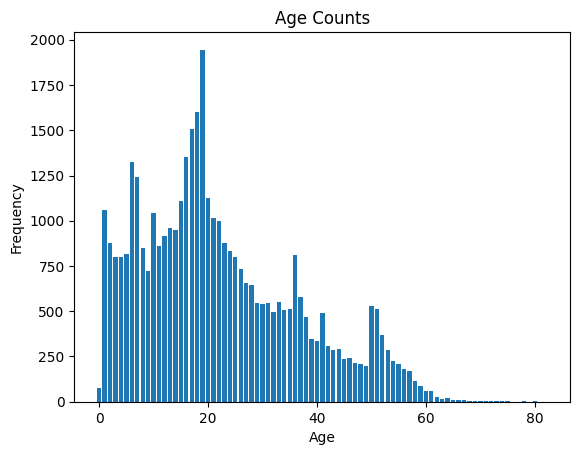

In [22]:
import matplotlib.pyplot as plt

# 데이터프레임에서 값의 빈도수 계산
tr_value_counts = tr.age.value_counts()
ts_value_counts = ts.age.value_counts()

# 막대 그래프 그리기
plt.bar(tr_value_counts.index, tr_value_counts.values)

# 그래프 제목 및 축 레이블 설정
plt.title('Age Counts')
plt.xlabel('Age')
plt.ylabel('Frequency')

# 그래프 표시
plt.show()

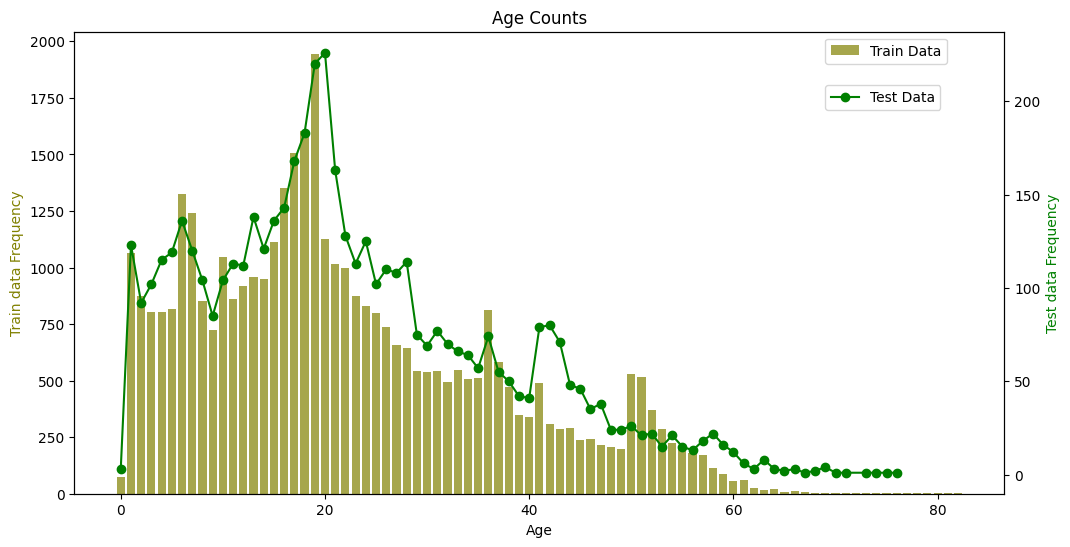

In [40]:
import matplotlib.pyplot as plt

# 데이터프레임에서 값의 빈도수 계산
tr_value_counts = tr.age.value_counts()
ts_value_counts = ts.age.value_counts()
ts_value_counts = ts_value_counts.sort_index()   # ts_value_counts를 age 값에 따라 정렬

# 새로운 Figure 객체 생성
fig, ax1 = plt.subplots(figsize=(12,6))

# 막대 그래프 (첫 번째 축)
ax1.bar(tr_value_counts.index, tr_value_counts.values, color='olive', alpha=0.7, label='Train Data')

# 첫 번째 축 레이블 설정
ax1.set_xlabel('Age')
ax1.set_ylabel('Train data Frequency', color='olive')

# 첫 번째 축 그래프의 타이틀 설정
plt.title('Age Counts')

# 두 번째 축 생성 (이중 축)
ax2 = ax1.twinx()

# 꺾은선 그래프 (두 번째 축)
ax2.plot(ts_value_counts.index, ts_value_counts.values, color='g', marker='o', linestyle='-', label='Test Data')

# 두 번째 축 레이블 설정
ax2.set_ylabel('Test data Frequency', color='g')

# 범례 추가
ax1.legend(loc='upper left', bbox_to_anchor=(0.8, 1.0))
ax2.legend(loc='upper left', bbox_to_anchor=(0.8, 0.9))

# 그래프 표시
plt.show()

→ 데이터를 0~9 / 10~19 / 20~29 / 30~39 / 40~49 / 50대이상으로 분류

### 데이터 연령대별로 나누어 저장하기

In [42]:
import os
import shutil

# 파일명을 파싱하여 클래스 레이블을 가져오기
def parse_filename(filename):
    split = filename.split('_')
    classname = split[2]
    return classname

# 데이터 연령대별 폴더링
def classify_dir(dir):
    for root, _, files in os.walk(dir):
        for file in files:
            file_path = os.path.join(root, file)
            
            # 파일명 파싱하여 클래스 레이블 가져오기
            label = parse_filename(file)  # parse_filename 함수 구현

            # 클래스 레이블에 따라 다른 디렉토리로 복사
            if int(label) < 10:
                class_dir = os.path.join(dir, '00~09')
                os.makedirs(class_dir, exist_ok=True)
                shutil.copy(file_path, os.path.join(class_dir, file))
            elif int(label) < 20:
                class_dir = os.path.join(dir, '10~19')
                os.makedirs(class_dir, exist_ok=True)
                shutil.copy(file_path, os.path.join(class_dir, file))
            elif int(label) < 30:   
                class_dir = os.path.join(dir, '20~29')
                os.makedirs(class_dir, exist_ok=True)
                shutil.copy(file_path, os.path.join(class_dir, file))
            elif int(label) < 40:
                class_dir = os.path.join(dir, '30~39')
                os.makedirs(class_dir, exist_ok=True)
                shutil.copy(file_path, os.path.join(class_dir, file))
            elif int(label) < 50:
                class_dir = os.path.join(dir, '40~49')
                os.makedirs(class_dir, exist_ok=True)
                shutil.copy(file_path, os.path.join(class_dir, file))
            else:
                class_dir = os.path.join(dir, '50~')
                os.makedirs(class_dir, exist_ok=True)
                shutil.copy(file_path, os.path.join(class_dir, file))

# 각 폴더의 파일갯수
def count_files(dir, type):
    folder = ['00~09', '10~19', '20~29', '30~39', '40~49','50~']
    count = []
    for i in folder:
        folder_path = os.path.join(dir, i)
        # 해당 폴더 내의 모든 파일 목록 가져오기
        file_type = '.'+type
        file_list = os.listdir(folder_path)
        ct = 0
        for file in file_list:
            if file.endswith(file_type):
                ct += 1
        count.append(ct)
    return sum(count)

In [38]:
img_train_class_dir = "D:\\Ddrive\\3rd\\data_ex\\training\\images"
lbl_train_class_dir = "D:\\Ddrive\\3rd\\data_ex\\training\\labels"

img_val_class_dir = "D:\\Ddrive\\3rd\\data_ex\\validation\\images"
lbl_val_class_dir = "D:\\Ddrive\\3rd\\data_ex\\validation\\labels"


In [88]:
classify_dir(img_train_class_dir)
classify_dir(lbl_train_class_dir)
count_files(img_train_class_dir, 'jpg'), count_files(lbl_train_class_dir, 'json')

(40150, 40150)

In [87]:
classify_dir(img_val_class_dir)
classify_dir(lbl_val_class_dir)
count_files(img_val_class_dir, 'jpg'), count_files(lbl_val_class_dir, 'json')

(5050, 5050)

### 누락된 파일 찾아 맞추기 (시행착오)

In [58]:
def files_list(dir):
    folder = ['00~09', '10~19', '20~29', '30~39', '40~49','50~']
    lists = []
    for i in folder:
        folder_path = os.path.join(dir, i)
        file_list = os.listdir(folder_path)
        lists.append(file_list)
    return lists

In [66]:
for i in range(0, 6):
    print(len(files_list(img_val_class_dir)[i]) == len(files_list(lbl_val_class_dir)[i]))

False
True
True
True
True
True


In [76]:
files_list(img_val_class_dir)[0][6], files_list(lbl_val_class_dir)[0][6]

('0895_1978_09_00000050_F.jpg', '0895_1978_09_00000050_F.json')

In [77]:
files_list(img_val_class_dir)[0][7], files_list(lbl_val_class_dir)[0][7]

('0897_1983_01_00000021_F.jpg', '0897_1983_00_00000020_F.json')

In [78]:
files_list(img_val_class_dir)[0][8], files_list(lbl_val_class_dir)[0][8]

('0897_1983_02_00000038_F.jpg', '0897_1983_01_00000021_F.json')

In [74]:
for i in range(len(files_list(img_val_class_dir)[0])):
    print(files_list(img_val_class_dir)[0][i].split('.')[0] == files_list(lbl_val_class_dir)[0][i].split('.')[0])

True
True
True
True
True
True
True
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False